### The Sparks Fondation 
Data Science and Business Analytics intern

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------
### TASK 2 : Prediction using Unsupervised Machine Learning
    
#### --------------------------------------------------------------------------------------------------------------------------------------------------------------

<br>

### Author : Bouyanzer Mohammed 

<br>

   - **Task Description:** From the given Iris dataset predict the optimum number of clusters and represent it visually.


In [50]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt  

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [51]:
# Reading Data 

iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
iris_df.drop(columns=["Id","Species"],axis=1, inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Understanding the Data

In [53]:
iris_df.shape

(150, 4)

In [54]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [55]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [56]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [57]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values

In [58]:
# Finding the optimum number of clusters 

tab = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    tab.append(kmeans.inertia_)


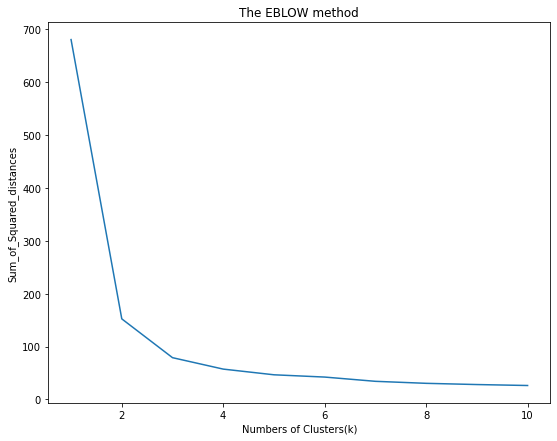

In [59]:
# Plotting to observe 'The elbow'

plt.figure(figsize=(9,7))
plt.plot(range(1,11),tab)
plt.title("The EBLOW method")
plt.xlabel("Numbers of Clusters(k)")
plt.ylabel("Sum_of_Squared_distances");

**From elbow method : the best K cluster is 3**

In [60]:
# Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [61]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

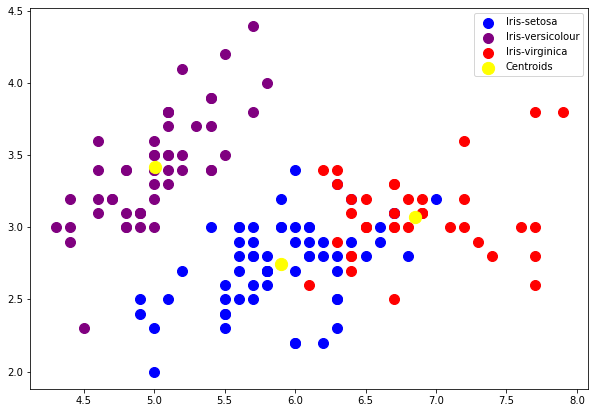

In [62]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(10,7))
plt.scatter(x= X[y_kmeans==0, 0], y= X[y_kmeans==0, 1], c="blue", label='Iris-setosa',s=100)
plt.scatter(x= X[y_kmeans==1, 0], y= X[y_kmeans==1, 1], c="purple", label='Iris-versicolour',s=100)
plt.scatter(x= X[y_kmeans==2, 0], y= X[y_kmeans==2, 1], c="red", label='Iris-virginica',s=100)

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids',s=150)
plt.legend();